#### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Objective of Analysis

    .Understand the dataset
    .Clean and preprocess the dataset
    .Once dataset is cleaned and preprocessed answers the following

    1.What is overall trends?
    2.Which are the top 10 products by the sales?
    3.Which are the most selling products(quantity)?
    4.Which is the most prefered shiping method?
    5.which are the most profitable categories and sub categories?
    6.which are the less profitable categories and sub categories?
    7.Which are the bottom 10 products by the sales?
    8.Which are the least selling products(quantity)?



## Step 1 : Load the DataSet

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_excel("/home/divyasale/Downloads/superstore_sales.xlsx")

In [4]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2.0,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3.0,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4.0,NaN,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3.0,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5.0,0.1,37.770,4.70,Medium,2011


In [5]:
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2.0,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1.0,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3.0,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1.0,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3.0,0.2,-0.6048,0.170,Medium,2014


In [6]:
df.shape

(51290, 21)

In [7]:
df.size

1077090

In [8]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51254 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

## Step 2 : Clean and Preprocess the dataset

In [10]:
# Check if there is duplicates records or not, If yes then drop them
print("Shape of original DataSet",df.shape)
df=df.drop_duplicates()
print("Shape of DataSet after dropping duplicates",df.shape)

Shape of original DataSet (51290, 21)
Shape of DataSet after dropping duplicates (51290, 21)


In [11]:
#Check for missing values
df.isnull().sum()

order_id            0
order_date          0
ship_date           0
ship_mode          36
customer_name       0
segment             0
state               0
country             0
market              0
region              0
product_id          0
category            0
sub_category        0
product_name        0
sales               0
quantity           31
discount          188
profit              0
shipping_cost       0
order_priority     13
year                0
dtype: int64

In [12]:
df.isnull().sum().sum()

268

In [13]:
df.isnull().sum().sum()/len(df)*100   #Percentage of duplicate records

0.5225190095535192

In [14]:
51290*99.5/100

51033.55

###### In our dataset missing values are present in ship_mode,quantity, discount and order_priority

#### Lets impute the missing values in ship_mode

In [15]:
df.ship_mode.unique()

array(['Standard Class', 'Second Class', 'Same Day', nan, 'First Class'],
      dtype=object)

In [16]:
df.ship_mode.value_counts()

Standard Class    30739
Second Class      10309
First Class        7505
Same Day           2701
Name: ship_mode, dtype: int64

In [17]:
30739/51290

0.5993176057711055

<AxesSubplot:xlabel='ship_mode', ylabel='count'>

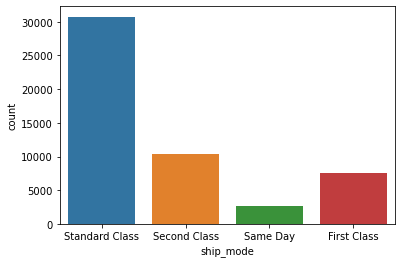

In [18]:
sns.countplot(x="ship_mode",data=df)

In [19]:
df.ship_mode=df.ship_mode.fillna("Standard Class")

In [20]:
#Check missing values
df.isnull().sum()

order_id            0
order_date          0
ship_date           0
ship_mode           0
customer_name       0
segment             0
state               0
country             0
market              0
region              0
product_id          0
category            0
sub_category        0
product_name        0
sales               0
quantity           31
discount          188
profit              0
shipping_cost       0
order_priority     13
year                0
dtype: int64

#### Lets impute the missing values in quantity

In [21]:
df.quantity.unique()

array([ 2.,  3.,  4.,  5., nan,  1.,  7.,  6.,  8.,  9., 10., 11., 12.,
       14., 13.])

In [22]:
df.quantity=df.quantity.fillna(1)

In [23]:
df.isnull().sum()

order_id            0
order_date          0
ship_date           0
ship_mode           0
customer_name       0
segment             0
state               0
country             0
market              0
region              0
product_id          0
category            0
sub_category        0
product_name        0
sales               0
quantity            0
discount          188
profit              0
shipping_cost       0
order_priority     13
year                0
dtype: int64

#### Lets impute the missing values for discount

In [24]:
df.discount.unique()

array([0.   , 0.1  ,   nan, 0.5  , 0.4  , 0.45 , 0.55 , 0.47 , 0.002,
       0.6  , 0.2  , 0.8  , 0.17 , 0.25 , 0.7  , 0.402, 0.35 , 0.27 ,
       0.15 , 0.37 , 0.65 , 0.3  , 0.15 , 0.07 , 0.602, 0.32 , 0.202,
       0.57 , 0.85 , 0.45 ])

In [25]:
df.discount=df.discount.fillna(0)

In [26]:
df.isnull().sum()

order_id           0
order_date         0
ship_date          0
ship_mode          0
customer_name      0
segment            0
state              0
country            0
market             0
region             0
product_id         0
category           0
sub_category       0
product_name       0
sales              0
quantity           0
discount           0
profit             0
shipping_cost      0
order_priority    13
year               0
dtype: int64

#### Lets impute the missing values for order_priority

In [27]:
df.order_priority.unique()

array(['Medium', 'High', 'Critical', nan, 'Low'], dtype=object)

In [28]:
df.order_priority=df.order_priority.fillna("Low")

In [29]:
#Check for missing values
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [30]:
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


## 1.What is overall Sales trends?

In [32]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [33]:
df.year.unique()

array([2011, 2012, 2013, 2014])

In [35]:
df.order_date.min()

Timestamp('2011-01-01 00:00:00')

In [36]:
df.order_date.min()

Timestamp('2011-01-01 00:00:00')

In [37]:
df.order_date.head()

0   2011-01-01
1   2011-01-01
2   2011-01-01
3   2011-01-01
4   2011-01-01
Name: order_date, dtype: datetime64[ns]

In [38]:
df["year_month"]=df["order_date"].apply(lambda x:x.strftime("%Y-%m"))

In [39]:
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,year_month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2.0,0.0,106.1400,35.460,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3.0,0.1,36.0360,9.720,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4.0,0.0,29.6400,8.170,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3.0,0.5,-26.0550,4.820,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5.0,0.1,37.7700,4.700,Medium,2011,2011-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2.0,0.2,4.5188,0.890,Medium,2014,2014-12
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1.0,0.0,0.4200,0.490,Medium,2014,2014-12
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3.0,0.0,12.3600,0.350,Medium,2014,2014-12
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1.0,0.0,0.5600,0.199,Medium,2014,2014-12


In [40]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,year_month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2.0,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3.0,0.1,36.036,9.72,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4.0,0.0,29.640,8.17,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3.0,0.5,-26.055,4.82,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5.0,0.1,37.770,4.70,Medium,2011,2011-01


In [41]:
df.year_month.unique()

array(['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
       '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
       '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
       '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
       '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
       '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
       '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12'],
      dtype=object)

In [42]:
df_sales_trends=df.groupby("year_month").sum()["sales"].reset_index()

In [43]:
df_sales_trends

,year_month,sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610
5,2011-06,215207.38022
6,2011-07,115510.41912
7,2011-08,207581.49122
8,2011-09,290214.45534
9,2011-10,199071.26404


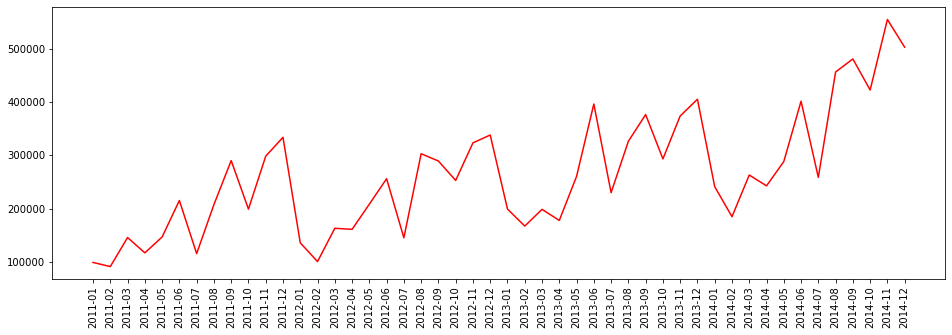

In [44]:
plt.figure(figsize=(16,5))
plt.plot(df_sales_trends.year_month,df_sales_trends.sales,color='r')
plt.xticks(rotation="vertical")
plt.show()

In [45]:
df_sales_trends1=df.groupby("year").sum()["sales"].reset_index()

In [46]:
df_sales_trends1

,year,sales
0,2011,2.259451e+06
1,2012,2.677439e+06
2,2013,3.405746e+06
3,2014,4.299866e+06


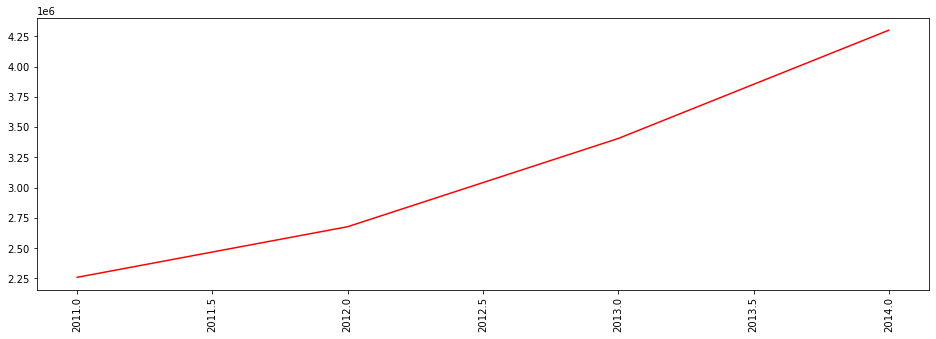

In [47]:
plt.figure(figsize=(16,5))
plt.plot(df_sales_trends1.year,df_sales_trends1.sales,color='r')
plt.xticks(rotation="vertical")
plt.show()

#### Conclusion - In first 4-5 months of every year sales are low and later months it is increasesing but overall sales are increasing

## 2.Which are the top 10 products by the sales

In [48]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'year_month'],
      dtype='object')

In [49]:
df.product_name.value_counts()

Staples                                                                227
Cardinal Index Tab, Clear                                               92
Eldon File Cart, Single Width                                           90
Rogers File Cart, Single Width                                          84
Ibico Index Tab, Clear                                                  83
                                                                      ... 
Jiffy Padded Mailers with Self-Seal Closure                              1
Avaya IP Phone 1140E VoIP phone                                          1
Lexmark X 9575 Professional All-in-One Color Printer                     1
Okidata B401 Printer                                                     1
Hunt BOSTON Model 1606 High-Volume Electric Pencil Sharpener, Beige      1
Name: product_name, Length: 3788, dtype: int64

In [50]:
df_prod_sales=pd.DataFrame(df.groupby("product_name").sum()['sales'])

In [51]:
df_prod_sales

,sales
product_name,
"""While you Were Out"" Message Book, One Form per Page",25.228
"#10 Gummed Flap White Envelopes, 100/Box",41.300
#10 Self-Seal White Envelopes,108.682
"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672
...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",477.660
iOttie HLCRIO102 Car Mount,215.892
iOttie XL Car Mount,223.888


In [52]:
df_prod_sales=df_prod_sales.sort_values(by=['sales'],ascending=False)

In [53]:
df_prod_sales.head(10)

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


## 3.Which are the most selling products(quantity)?

In [54]:
df_prod_quant=pd.DataFrame(df.groupby("product_name").sum()['quantity'])

In [55]:
df_prod_quant

,quantity
product_name,
"""While you Were Out"" Message Book, One Form per Page",8.0
"#10 Gummed Flap White Envelopes, 100/Box",11.0
#10 Self-Seal White Envelopes,10.0
"#10 White Business Envelopes,4 1/8 x 9 1/2",32.0
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",37.0
...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",24.0
iOttie HLCRIO102 Car Mount,12.0
iOttie XL Car Mount,14.0


In [56]:
df_prod_quant=df_prod_quant.sort_values(by=['quantity'],ascending=False)

In [57]:
df_prod_quant.head(10)

,quantity
product_name,
Staples,876.0
"Cardinal Index Tab, Clear",337.0
"Eldon File Cart, Single Width",321.0
"Rogers File Cart, Single Width",262.0
"Sanford Pencil Sharpener, Water Color",259.0
"Stockwell Paper Clips, Assorted Sizes",253.0
"Avery Index Tab, Clear",252.0
"Ibico Index Tab, Clear",251.0
"Smead File Cart, Single Width",250.0


## Q4. Which is the most prefered shiping method

In [58]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'year_month'],
      dtype='object')

In [59]:
df.ship_mode.value_counts()

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: ship_mode, dtype: int64

<AxesSubplot:xlabel='ship_mode', ylabel='count'>

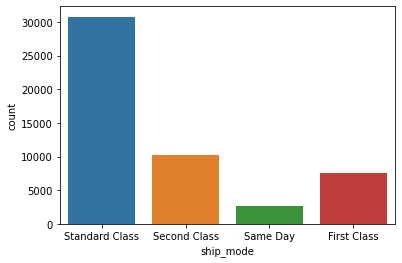

In [60]:
sns.countplot(x="ship_mode",data=df)

##### Conclusion:- So the most prefered shiping method is Standard Class

## Q5. which are the most profitable categories and sub categories

In [61]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'year_month'],
      dtype='object')

In [62]:
df.groupby(['category','sub_category']).sum()['profit']

category         sub_category
Furniture        Bookcases       161924.41950
                 Chairs          141973.79750
                 Furnishings      46967.42550
                 Tables          -64083.38870
Office Supplies  Appliances      141680.58940
                 Art              57953.91090
                 Binders          72449.84600
                 Envelopes        29601.11630
                 Fasteners        11525.42410
                 Labels           15010.51200
                 Paper            59207.68270
                 Storage         108461.48980
                 Supplies         22583.26310
Technology       Accessories     129626.30620
                 Copiers         258567.54818
                 Machines         58867.87300
                 Phones          216717.00580
Name: profit, dtype: float64

In [63]:
df_cat_subc_profit=pd.DataFrame(df.groupby(['category','sub_category']).sum()['profit'])

In [64]:
df_cat_subc_profit

profit
category        sub_category              
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870
Office Supplies Appliances    141680.58940
                Art            57953.91090
                Binders        72449.84600
                Envelopes      29601.11630
                Fasteners      11525.42410
                Labels         15010.51200
                Paper          59207.68270
                Storage       108461.48980
                Supplies       22583.26310
Technology      Accessories   129626.30620
                Copiers       258567.54818
                Machines       58867.87300
                Phones        216717.00580

In [65]:
df_cat_subc_profit.sort_values(by=['category','profit'],ascending=False)

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870

## Q6. which are the least profitable categories and sub categories

In [66]:
df_cat_subc_profit.sort_values(by=['category','profit'],ascending=True)

profit
category        sub_category              
Furniture       Tables        -64083.38870
                Furnishings    46967.42550
                Chairs        141973.79750
                Bookcases     161924.41950
Office Supplies Fasteners      11525.42410
                Labels         15010.51200
                Supplies       22583.26310
                Envelopes      29601.11630
                Art            57953.91090
                Paper          59207.68270
                Binders        72449.84600
                Storage       108461.48980
                Appliances    141680.58940
Technology      Machines       58867.87300
                Accessories   129626.30620
                Phones        216717.00580
                Copiers       258567.54818

## Q7. Which are the bottom 10 products by the sales

In [67]:
df_prod_quant.tail(10)

,quantity
product_name,
Avery 5,2.0
NeatDesk Desktop Scanner & Digital Filing System,2.0
Hewlett-Packard Deskjet F4180 All-in-One Color Ink-jet - Printer / copier / scanner,2.0
Ultra Commercial Grade Dual Valve Door Closer,2.0
"Chromcraft Training Table, Adjustable Height",1.0
Penpower WorldCard Pro Card Scanner,1.0
"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",1.0
Boston 1900 Electric Pencil Sharpener,1.0
Xerox 20,1.0


## Q9. In which year we got more orders

In [68]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'year_month'],
      dtype='object')

<AxesSubplot:xlabel='year', ylabel='count'>

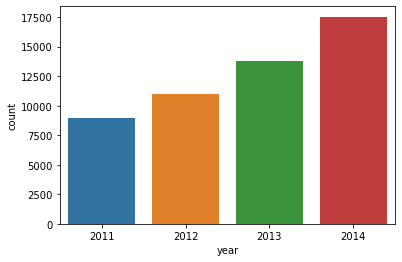

In [69]:
sns.countplot(x='year',data=df)

#### Conclusion:- In 2014 we got more orders

## Q10. from which country we got more orders

In [70]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'year_month'],
      dtype='object')

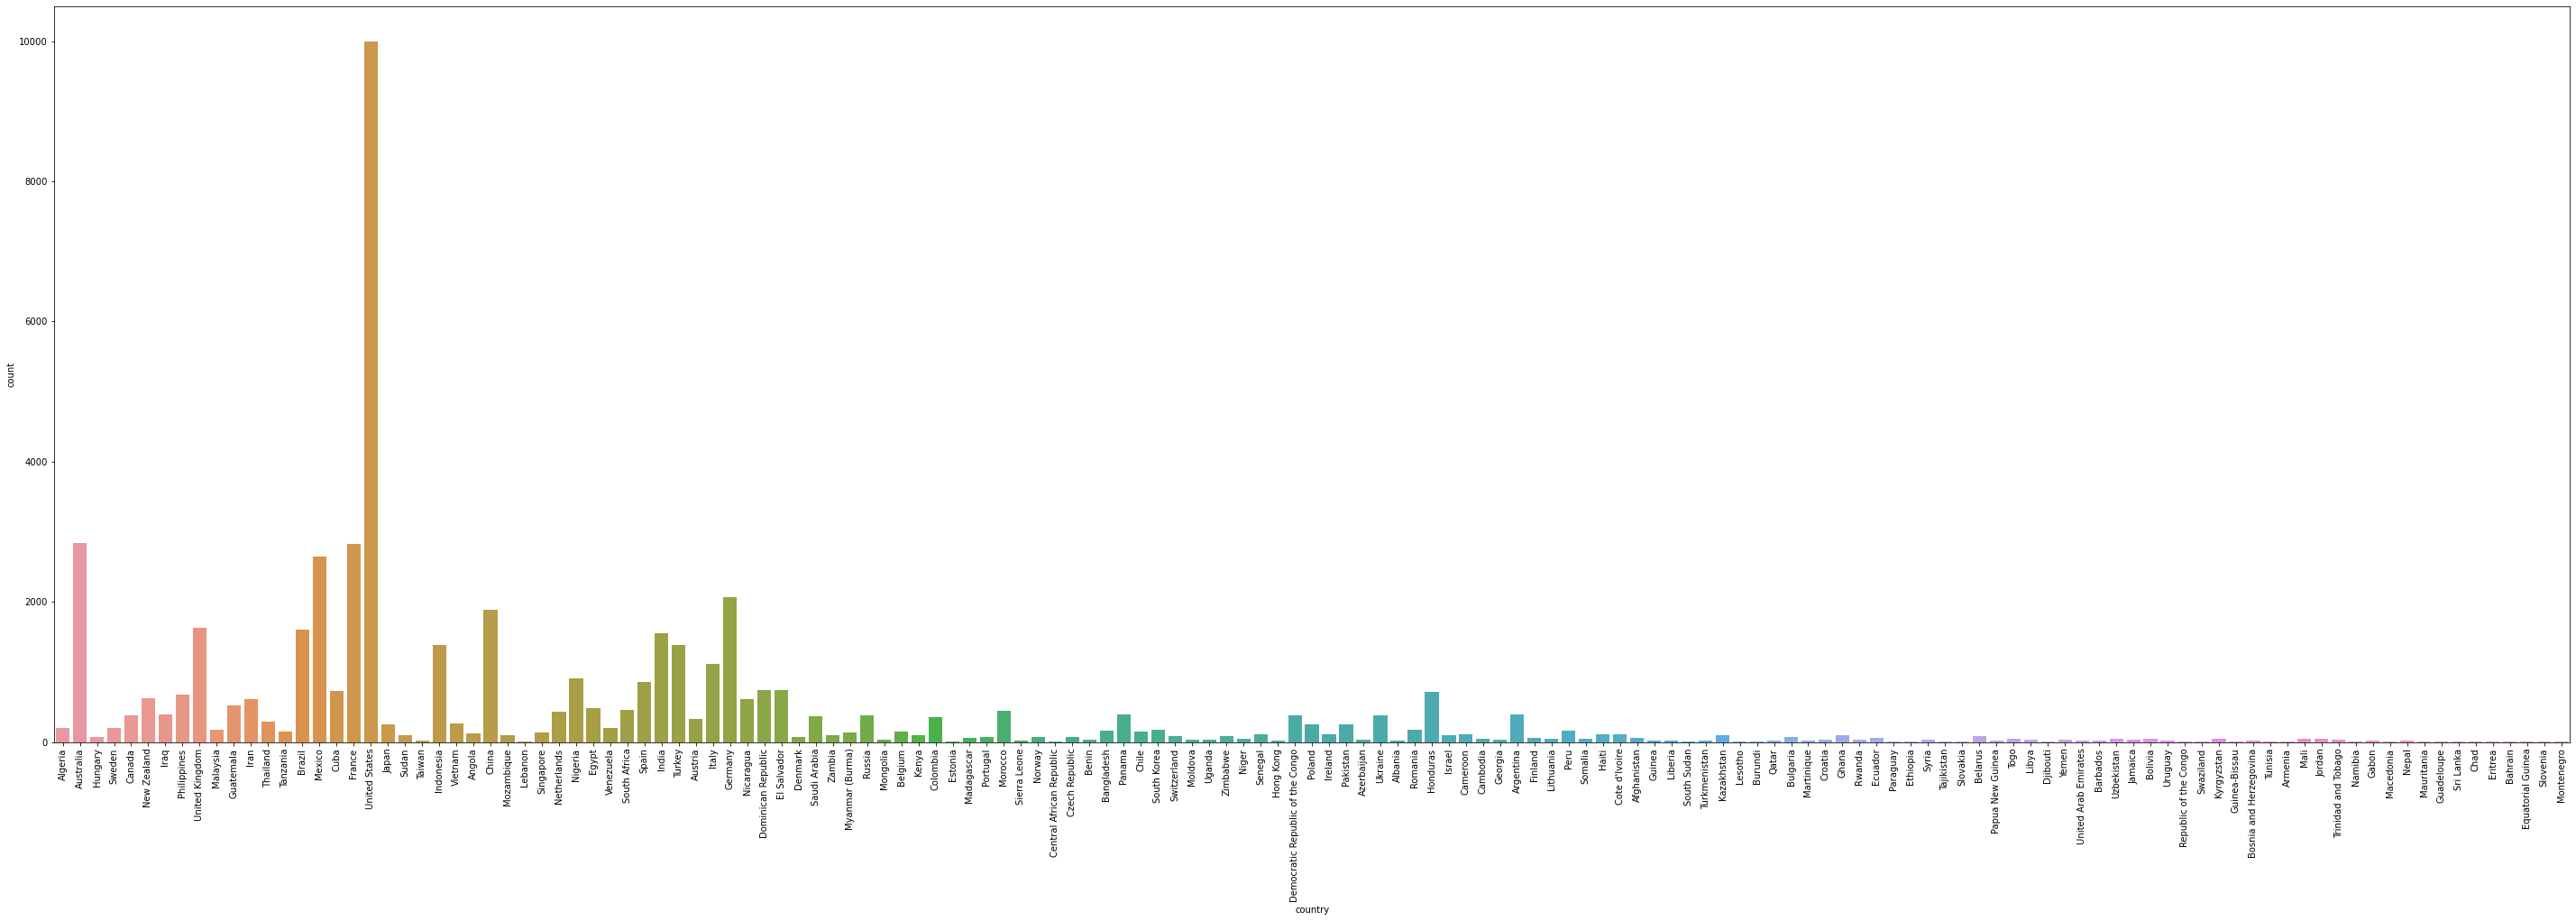

In [71]:
plt.figure(figsize=(50,15))
sns.countplot(x='country',data=df)
plt.xticks(rotation='vertical')
plt.show()

#### Conclusion:- From United States we get more orders

## Q11. How much average discount is given

In [72]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'year_month'],
      dtype='object')

In [73]:
df.discount.mean()

0.14290754533046662

#### conclusion:-The average discount given is 0.14290754533046662

## Q12. Tell us the total profit made by our company

In [74]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'year_month'],
      dtype='object')

In [75]:
df.profit.sum()

1469034.8212799998

#### Conclusion :- The total profit made by our company is 1469034.8212799998